# Convolutional Neural Networks (CNNs)

A Convolutional Neural Network (CNN) is a deep learning architecture specialized for visual and spatial data (images, video frames, grids). CNNs automatically learn hierarchical features—from edges to objects—directly from raw pixels.


In [2]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

CNN in MNIST Data

In [5]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
import matplotlib.pyplot as plt

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical



In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\Suresh\Desktop\DSML\Projects\DS-P1\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9584 - loss: 0.1358 - val_accuracy: 0.9880 - val_loss: 0.0455
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9857 - loss: 0.0445 - val_accuracy: 0.9885 - val_loss: 0.0381
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9910 - val_loss: 0.0305
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9897 - val_loss: 0.0356
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9945 - loss: 0.0160 - val_accuracy: 0.9902 - val_loss: 0.0368
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9956 - loss: 0.0131 - val_accuracy: 0.9895 - val_loss: 0.0389
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9964 - loss: 0.0105 - val_accuracy: 0.9912 - val_loss: 0.0367
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9972 - los

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9924 - loss: 0.0327
Test Accuracy: 0.9923999905586243


In [19]:
import pandas as pd 

df = pd.DataFrame(history.history)

In [20]:
df

,accuracy,loss,val_accuracy,val_loss
0,0.958389,0.135773,0.988000,0.045461
1,0.985704,0.044472,0.988500,0.038092
2,0.989815,0.031183,0.991000,0.030457
3,0.992926,0.022008,0.989667,0.035626
4,0.994537,0.016035,0.990167,0.036784
5,0.995630,0.013069,0.989500,0.038902
6,0.996444,0.010504,0.991167,0.036699
7,0.997222,0.008217,0.991333,0.039182
8,0.997315,0.007485,0.992667,0.033916
9,0.997852,0.006781,0.992500,0.041699


<Axes: >

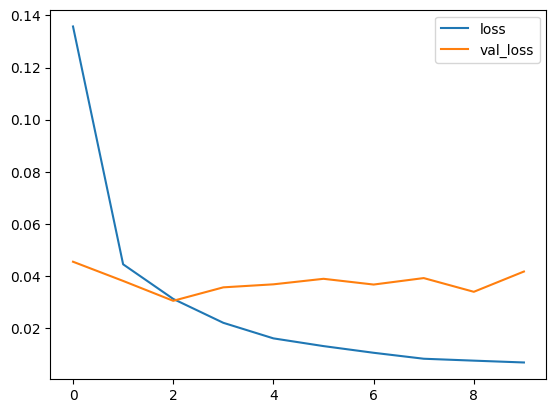

In [29]:
df[["loss", "val_loss"]].plot.line()

In [21]:
from sklearn.metrics import confusion_matrix


In [24]:
pred = np.argmax(model.predict(X_test), axis = 1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [28]:
from sklearn.metrics import confusion_matrix

y_true = y_test.argmax(axis=1)
y_pred = pred

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[ 977    1    0    0    1    0    0    0    0    1]
 [   0 1130    0    2    0    1    1    0    0    1]
 [   0    1 1018    0    1    0    0    9    3    0]
 [   0    0    0 1003    0    4    0    0    3    0]
 [   0    0    0    0  977    0    1    0    1    3]
 [   0    0    0    6    0  883    1    1    1    0]
 [   1    2    0    0    1    2  949    0    3    0]
 [   0    2    2    1    1    0    0 1016    1    5]
 [   1    0    0    1    1    0    0    0  970    1]
 [   0    0    0    0    3    2    0    0    3 1001]]
